In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import (mean_squared_error, mean_absolute_error, 
                           accuracy_score, confusion_matrix, classification_report,
                           precision_score, recall_score, f1_score)
import warnings
warnings.filterwarnings('ignore')

print("Библиотеки успешно импортированы!")

Библиотеки успешно импортированы!


In [2]:
# Ячейка 2: Загрузка данных
# Загрузи свой обработанный датасет из первой лабораторной
df = pd.read_csv('processed_titanic.csv')  # или как ты назвал свой файл

print(f"Размер датасета: {df.shape}")
print("\nПервые 5 строк:")
df.head()

Размер датасета: (891, 13)

Первые 5 строк:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Age_normalized,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.271174,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0.472229,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.321438,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.434531,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0.434531,False,True


In [3]:
# Ячейка 3: Анализ данных и выбор целевых переменных
print("Информация о датасете:")
df.info()
print("\nСтатистика числовых столбцов:")
df.describe()

# Выбери столбцы для задач:
# - Для РЕГРЕССИИ: непрерывный числовой столбец (например, 'Age', 'Fare')
# - Для КЛАССИФИКАЦИИ: категориальный столбец (например, 'Survived', 'Pclass')

# Пример выбора (ЗАМЕНИ НА СВОИ СТОЛБЦЫ!):
target_regression = 'Fare'      # непрерывная переменная для регрессии
target_classification = 'Survived'  # категориальная для классификации

print(f"\nЦелевая переменная для регрессии: {target_regression}")
print(f"Целевая переменная для классификации: {target_classification}")

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    int64  
 5   Age             891 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Age_normalized  891 non-null    float64
 11  Embarked_Q      891 non-null    bool   
 12  Embarked_S      891 non-null    bool   
dtypes: bool(2), float64(3), int64(6), object(2)
memory usage: 78.4+ KB

Статистика числовых столбцов:

Целевая переменная для регрессии: Fare
Целевая переменная для классификации: Survived


In [4]:
# Ячейка 4: Разделение данных для регрессии и классификации

# Для РЕГРЕССИИ
X_reg = df.drop(target_regression, axis=1)
y_reg = df[target_regression]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.4, random_state=42
)

# Дополнительное разделение тестовой на тест и валидацию
X_test_reg, X_val_reg, y_test_reg, y_val_reg = train_test_split(
    X_test_reg, y_test_reg, test_size=0.5, random_state=42
)

print("=== РЕГРЕССИЯ ===")
print(f"Обучающая: {X_train_reg.shape}")
print(f"Тестовая: {X_test_reg.shape}")
print(f"Валидационная: {X_val_reg.shape}")

# Для КЛАССИФИКАЦИИ
X_clf = df.drop(target_classification, axis=1)
y_clf = df[target_classification]

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.4, random_state=42, stratify=y_clf
)

X_test_clf, X_val_clf, y_test_clf, y_val_clf = train_test_split(
    X_test_clf, y_test_clf, test_size=0.5, random_state=42, stratify=y_test_clf
)

print("\n=== КЛАССИФИКАЦИЯ ===")
print(f"Обучающая: {X_train_clf.shape}")
print(f"Тестовая: {X_test_clf.shape}")
print(f"Валидационная: {X_val_clf.shape}")

=== РЕГРЕССИЯ ===
Обучающая: (534, 12)
Тестовая: (178, 12)
Валидационная: (179, 12)

=== КЛАССИФИКАЦИЯ ===
Обучающая: (534, 12)
Тестовая: (178, 12)
Валидационная: (179, 12)


In [6]:
# Ячейка 2.5: Преобразование категориальных данных в числовые
print("=== ПРЕОБРАЗОВАНИЕ КАТЕГОРИАЛЬНЫХ ДАННЫХ ===")

# Создаем копию датафрейма, чтобы не испортить оригинал
df_encoded = df.copy()

# Определяем категориальные столбцы (строковые типы)
categorical_columns = df_encoded.select_dtypes(include=['object']).columns.tolist()
print(f"Категориальные столбцы: {categorical_columns}")

# Применяем One-Hot Encoding для категориальных признаков
if categorical_columns:
    df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns, drop_first=True)
    print(f"После One-Hot Encoding: {df_encoded.shape}")

# Проверяем, что все данные теперь числовые
print("\nТипы данных после преобразования:")
print(df_encoded.dtypes.value_counts())

# Проверяем наличие NaN значений
print(f"\nПропущенные значения: {df_encoded.isnull().sum().sum()}")

# Заполняем оставшиеся NaN (если есть)
if df_encoded.isnull().sum().sum() > 0:
    # Для числовых столбцов заполняем медианой
    numeric_columns = df_encoded.select_dtypes(include=[np.number]).columns
    df_encoded[numeric_columns] = df_encoded[numeric_columns].fillna(df_encoded[numeric_columns].median())
    print("NaN значения заполнены медианой")

print(f"Финальный размер датасета: {df_encoded.shape}")
df_encoded.head()

=== ПРЕОБРАЗОВАНИЕ КАТЕГОРИАЛЬНЫХ ДАННЫХ ===
Категориальные столбцы: ['Name', 'Ticket']
После One-Hot Encoding: (891, 1581)

Типы данных после преобразования:
bool       1572
int64         6
float64       3
Name: count, dtype: int64

Пропущенные значения: 0
Финальный размер датасета: (891, 1581)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_normalized,Embarked_Q,...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,1,0,3,0,22.0,1,0,7.2500,0.271174,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,1,38.0,1,0,71.2833,0.472229,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,1,26.0,0,0,7.9250,0.321438,False,...,False,False,False,False,False,False,False,False,False,False
3,4,1,1,1,35.0,1,0,53.1000,0.434531,False,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,0,35.0,0,0,8.0500,0.434531,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Ячейка 4: Разделение данных для регрессии и классификации (ОБНОВЛЕННАЯ)

# Используем преобразованный датафрейм
df_processed = df_encoded

# Для РЕГРЕССИИ
X_reg = df_processed.drop(target_regression, axis=1)
y_reg = df_processed[target_regression]

# Проверяем, что целевая переменная числовая
print(f"Тип целевой переменной регрессии: {y_reg.dtype}")

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.4, random_state=42
)

# Дополнительное разделение тестовой на тест и валидацию
X_test_reg, X_val_reg, y_test_reg, y_val_reg = train_test_split(
    X_test_reg, y_test_reg, test_size=0.5, random_state=42
)

print("=== РЕГРЕССИЯ ===")
print(f"Обучающая: {X_train_reg.shape}")
print(f"Тестовая: {X_test_reg.shape}")
print(f"Валидационная: {X_val_reg.shape}")

# Для КЛАССИФИКАЦИИ
X_clf = df_processed.drop(target_classification, axis=1)
y_clf = df_processed[target_classification]

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.4, random_state=42, stratify=y_clf
)

X_test_clf, X_val_clf, y_test_clf, y_val_clf = train_test_split(
    X_test_clf, y_test_clf, test_size=0.5, random_state=42, stratify=y_test_clf
)

print("\n=== КЛАССИФИКАЦИЯ ===")
print(f"Обучающая: {X_train_clf.shape}")
print(f"Тестовая: {X_test_clf.shape}")
print(f"Валидационная: {X_val_clf.shape}")

# Проверяем, что все данные числовые
print(f"\nТипы данных в X_train_reg: {X_train_reg.dtypes.unique()}")
print(f"Типы данных в X_train_clf: {X_train_clf.dtypes.unique()}")

Тип целевой переменной регрессии: float64
=== РЕГРЕССИЯ ===
Обучающая: (534, 1580)
Тестовая: (178, 1580)
Валидационная: (179, 1580)

=== КЛАССИФИКАЦИЯ ===
Обучающая: (534, 1580)
Тестовая: (178, 1580)
Валидационная: (179, 1580)

Типы данных в X_train_reg: [dtype('int64') dtype('float64') dtype('bool')]
Типы данных в X_train_clf: [dtype('int64') dtype('float64') dtype('bool')]


=== ЛИНЕЙНАЯ РЕГРЕССИЯ ===
Метрики качества:
MSE обучающая: 0.0000
MSE тестовая: 602.1284
RMSE тестовая: 24.5383
MAE тестовая: 13.5995
R² обучающая: 1.0000
R² тестовая: 0.6327


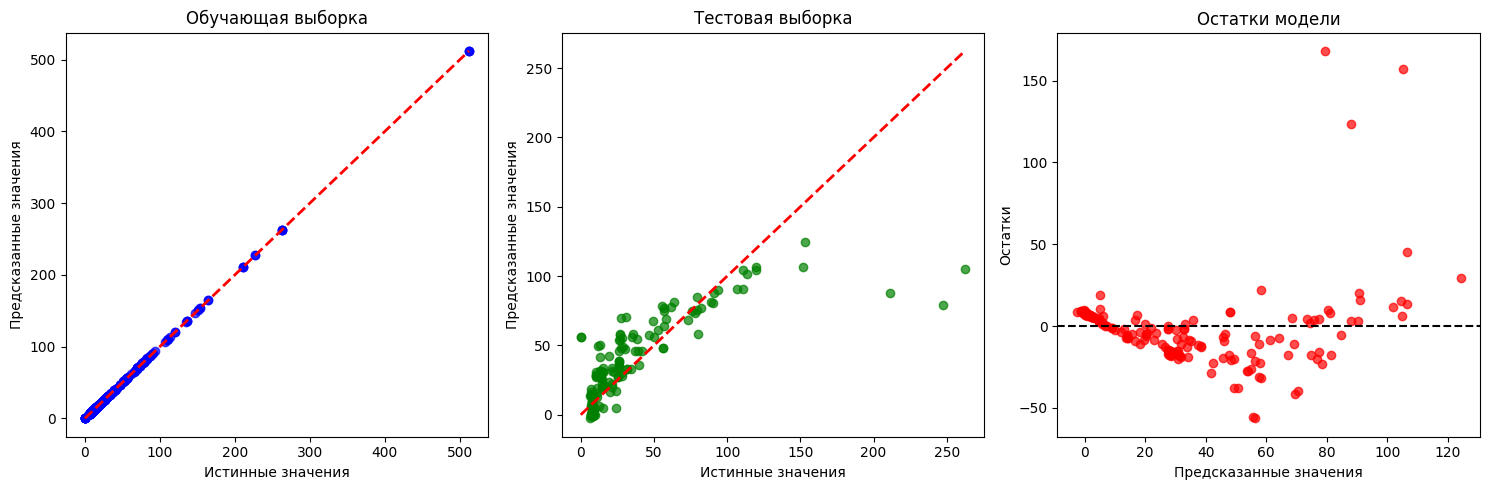

In [8]:
# Ячейка 5: Линейная регрессия
print("=== ЛИНЕЙНАЯ РЕГРЕССИЯ ===")

# Создание и обучение модели
linear_model = LinearRegression()
linear_model.fit(X_train_reg, y_train_reg)

# Предсказания
y_pred_train_reg = linear_model.predict(X_train_reg)
y_pred_test_reg = linear_model.predict(X_test_reg)

# Метрики качества
mse_train = mean_squared_error(y_train_reg, y_pred_train_reg)
mse_test = mean_squared_error(y_test_reg, y_pred_test_reg)
mae_test = mean_absolute_error(y_test_reg, y_pred_test_reg)
rmse_test = np.sqrt(mse_test)
r2_train = linear_model.score(X_train_reg, y_train_reg)
r2_test = linear_model.score(X_test_reg, y_test_reg)

print("Метрики качества:")
print(f"MSE обучающая: {mse_train:.4f}")
print(f"MSE тестовая: {mse_test:.4f}")
print(f"RMSE тестовая: {rmse_test:.4f}")
print(f"MAE тестовая: {mae_test:.4f}")
print(f"R² обучающая: {r2_train:.4f}")
print(f"R² тестовая: {r2_test:.4f}")

# Визуализация
plt.figure(figsize=(15, 5))

# График 1: Предсказания vs Истинные значения (обучающая)
plt.subplot(1, 3, 1)
plt.scatter(y_train_reg, y_pred_train_reg, alpha=0.7, color='blue')
plt.plot([y_train_reg.min(), y_train_reg.max()], 
         [y_train_reg.min(), y_train_reg.max()], 'r--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Обучающая выборка')

# График 2: Предсказания vs Истинные значения (тестовая)
plt.subplot(1, 3, 2)
plt.scatter(y_test_reg, y_pred_test_reg, alpha=0.7, color='green')
plt.plot([y_test_reg.min(), y_test_reg.max()], 
         [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Тестовая выборка')

# График 3: Остатки
plt.subplot(1, 3, 3)
residuals = y_test_reg - y_pred_test_reg
plt.scatter(y_pred_test_reg, residuals, alpha=0.7, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки модели')

plt.tight_layout()
plt.show()

In [9]:
# Ячейка 7: Логистическая регрессия
print("=== ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ ===")

# Базовая модель
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train_clf, y_train_clf)

# Предсказания
y_pred_clf = logreg_model.predict(X_test_clf)
y_pred_proba = logreg_model.predict_proba(X_test_clf)[:, 1]

# Метрики качества
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)

print("Метрики качества:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Матрица ошибок
cm = confusion_matrix(y_test_clf, y_pred_clf)

print("\nМатрица ошибок:")
print(cm)

=== ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ ===
Метрики качества:
Accuracy: 0.8258
Precision: 0.7937
Recall: 0.7353
F1-score: 0.7634

Матрица ошибок:
[[97 13]
 [18 50]]


=== ДЕТАЛЬНАЯ ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ КЛАССИФИКАЦИИ ===


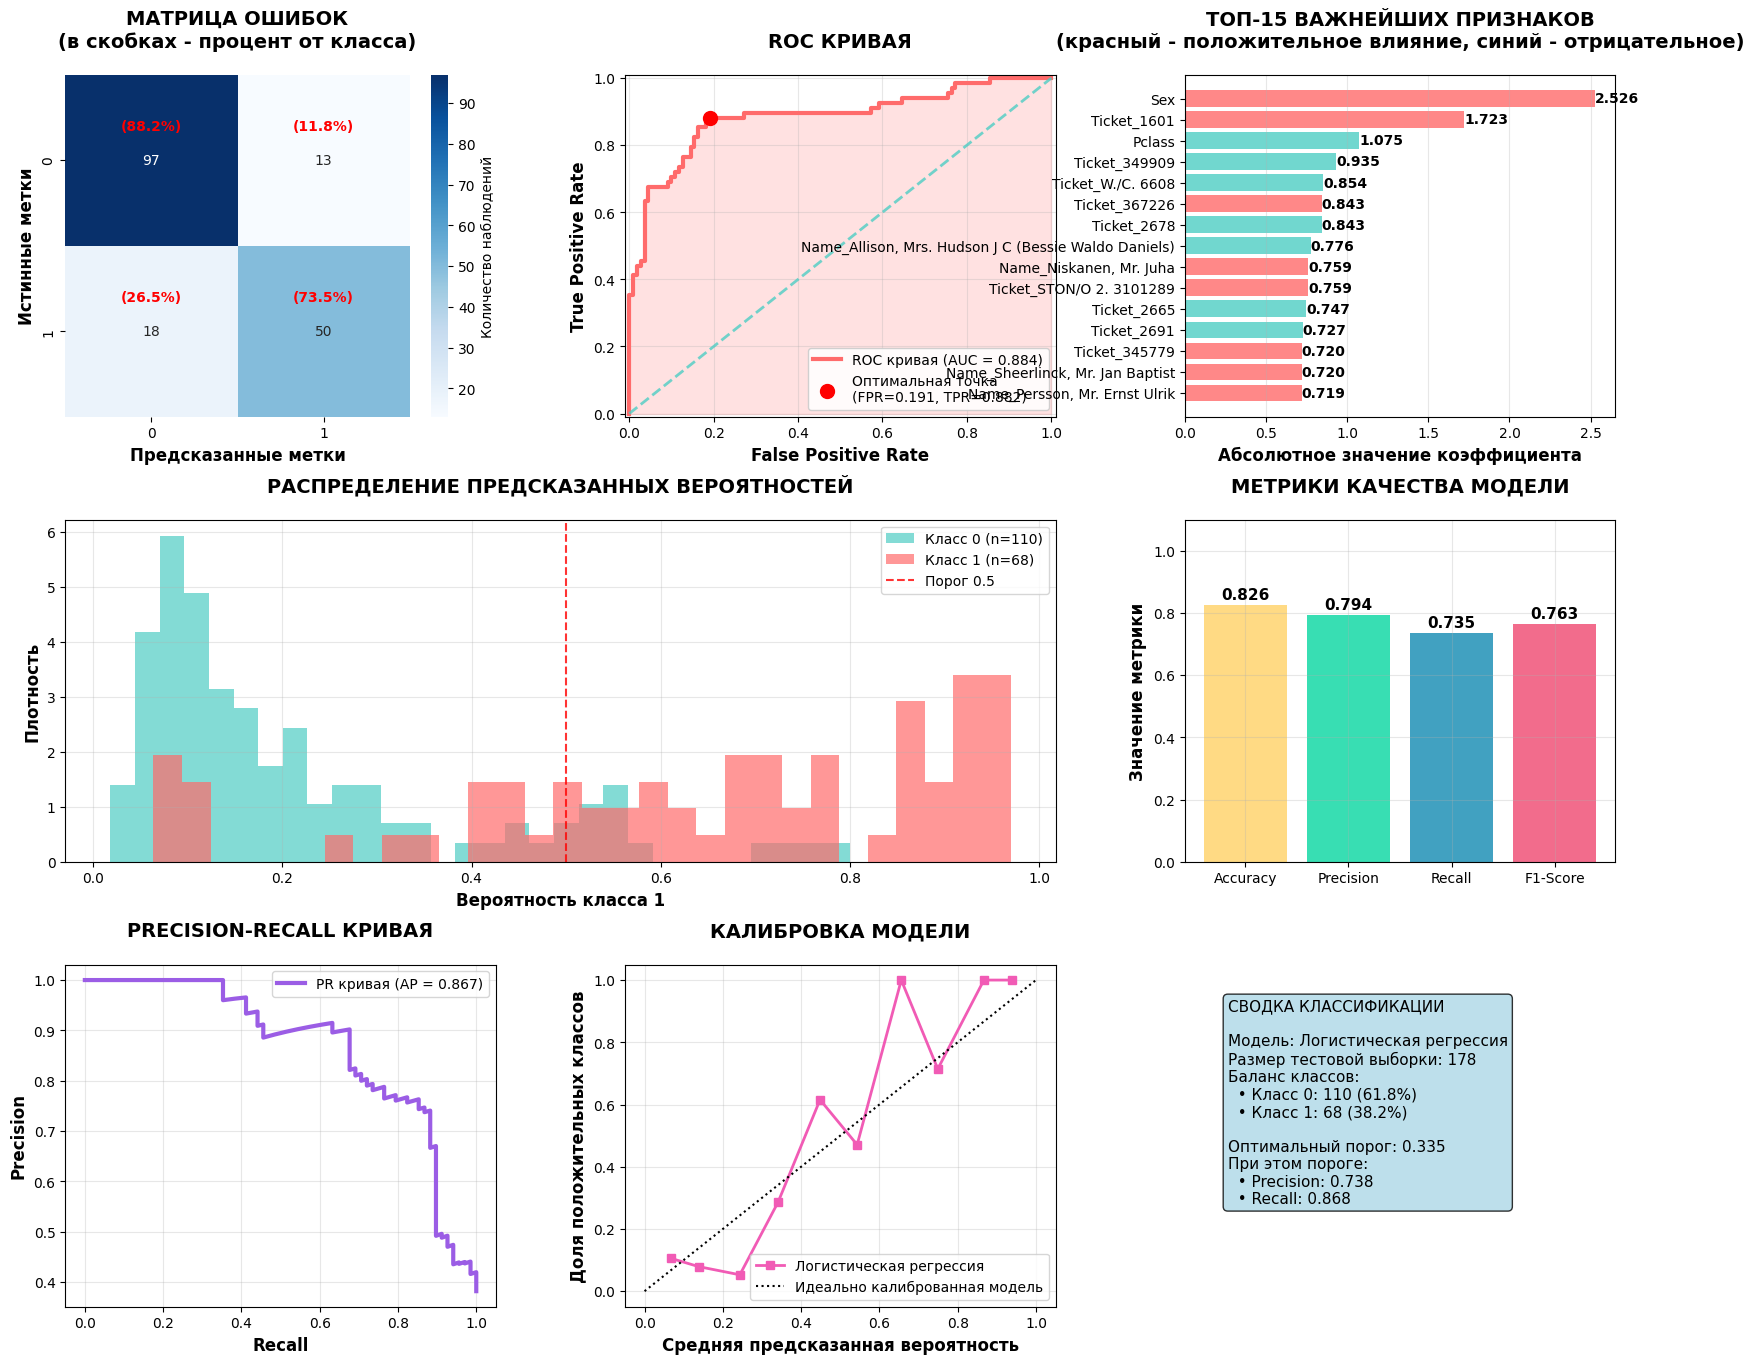


ДЕТАЛЬНЫЙ ОТЧЕТ КЛАССИФИКАЦИИ
              precision    recall  f1-score   support

     Класс 0       0.84      0.88      0.86       110
     Класс 1       0.79      0.74      0.76        68

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.83      0.82       178


ДОПОЛНИТЕЛЬНЫЕ МЕТРИКИ:
AUC-ROC: 0.8842
Average Precision: 0.8667
Оптимальный порог (Youden): 0.3349
Log Loss: 0.3960

МАТРИЦА ОШИБОК:
True Positive (TP): 50
True Negative (TN): 97
False Positive (FP): 13
False Negative (FN): 18

С ОПТИМАЛЬНЫМ ПОРОГОМ (0.335):
Accuracy: 0.8315
Precision: 0.7375
Recall: 0.8676
F1-Score: 0.7973


In [12]:
# Ячейка 8: УЛУЧШЕННАЯ ВИЗУАЛИЗАЦИЯ КЛАССИФИКАЦИИ
print("=== ДЕТАЛЬНАЯ ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ КЛАССИФИКАЦИИ ===")

# Дополнительный импорт для новых метрик
from sklearn.metrics import log_loss, precision_recall_curve, average_precision_score
from sklearn.calibration import calibration_curve

# Создаем красивую фигуру с сеткой
fig = plt.figure(figsize=(20, 16))
grid = plt.GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)

# ==================== ГРАФИК 1: УЛУЧШЕННАЯ МАТРИЦА ОШИБОК ====================
ax1 = fig.add_subplot(grid[0, 0])
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

sns.heatmap(cm, 
            annot=True, 
            fmt='d',
            cmap='Blues',
            cbar_kws={'label': 'Количество наблюдений'},
            ax=ax1)

# Добавляем проценты
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax1.text(j+0.5, i+0.3, f'({cm_percentage[i,j]:.1f}%)', 
                ha='center', va='center', color='red', fontweight='bold')

ax1.set_xlabel('Предсказанные метки', fontsize=12, fontweight='bold')
ax1.set_ylabel('Истинные метки', fontsize=12, fontweight='bold')
ax1.set_title('МАТРИЦА ОШИБОК\n(в скобках - процент от класса)', 
              fontsize=14, fontweight='bold', pad=20)

# ==================== ГРАФИК 2: ROC КРИВАЯ С ДОПОЛНИТЕЛЬНОЙ ИНФОРМАЦИЕЙ ====================
ax2 = fig.add_subplot(grid[0, 1])
plt.plot(fpr, tpr, color='#FF6B6B', lw=3, 
         label=f'ROC кривая (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='#4ECDC4', lw=2, linestyle='--', alpha=0.8)

# Добавляем точку оптимального порога (Youden's J statistic)
youden_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[youden_idx]
plt.scatter(fpr[youden_idx], tpr[youden_idx], 
           color='red', s=100, zorder=5,
           label=f'Оптимальная точка\n(FPR={fpr[youden_idx]:.3f}, TPR={tpr[youden_idx]:.3f})')

plt.fill_between(fpr, tpr, alpha=0.2, color='#FF6B6B')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC КРИВАЯ', fontsize=14, fontweight='bold', pad=20)
plt.legend(loc="lower right", framealpha=0.9)
plt.grid(True, alpha=0.3)

# ==================== ГРАФИК 3: ВАЖНОСТЬ ПРИЗНАКОВ (ТОП-15) ====================
ax3 = fig.add_subplot(grid[0, 2])

# Сортируем по важности и берем топ-15
feature_importance = pd.DataFrame({
    'feature': X_train_clf.columns,
    'importance': abs(logreg_model.coef_[0]),
    'direction': np.sign(logreg_model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=True).tail(15)

# Цвета в зависимости от направления влияния
colors = ['#FF6B6B' if dir == 1 else '#4ECDC4' for dir in feature_importance['direction']]

bars = ax3.barh(feature_importance['feature'], 
                feature_importance['importance'], 
                color=colors, alpha=0.8)

# Добавляем значения на барчарт
for bar in bars:
    width = bar.get_width()
    ax3.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center', fontweight='bold')

ax3.set_xlabel('Абсолютное значение коэффициента', fontsize=12, fontweight='bold')
ax3.set_title('ТОП-15 ВАЖНЕЙШИХ ПРИЗНАКОВ\n(красный - положительное влияние, синий - отрицательное)', 
              fontsize=14, fontweight='bold', pad=20)
ax3.grid(True, axis='x', alpha=0.3)

# ==================== ГРАФИК 4: РАСПРЕДЕЛЕНИЕ ВЕРОЯТНОСТЕЙ ====================
ax4 = fig.add_subplot(grid[1, :2])

# Разделяем вероятности по классам
prob_class_0 = y_pred_proba[y_test_clf == 0]
prob_class_1 = y_pred_proba[y_test_clf == 1]

plt.hist(prob_class_0, bins=30, alpha=0.7, color='#4ECDC4', 
         label=f'Класс 0 (n={len(prob_class_0)})', density=True)
plt.hist(prob_class_1, bins=30, alpha=0.7, color='#FF6B6B', 
         label=f'Класс 1 (n={len(prob_class_1)})', density=True)

plt.axvline(x=0.5, color='red', linestyle='--', alpha=0.8, label='Порог 0.5')
plt.xlabel('Вероятность класса 1', fontsize=12, fontweight='bold')
plt.ylabel('Плотность', fontsize=12, fontweight='bold')
plt.title('РАСПРЕДЕЛЕНИЕ ПРЕДСКАЗАННЫХ ВЕРОЯТНОСТЕЙ', 
          fontsize=14, fontweight='bold', pad=20)
plt.legend()
plt.grid(True, alpha=0.3)

# ==================== ГРАФИК 5: МЕТРИКИ КАЧЕСТВА ====================
ax5 = fig.add_subplot(grid[1, 2])

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors_metrics = ['#FFD166', '#06D6A0', '#118AB2', '#EF476F']

bars = ax5.bar(metrics, values, color=colors_metrics, alpha=0.8)

# Добавляем значения на столбцы
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

ax5.set_ylim(0, 1.1)
ax5.set_ylabel('Значение метрики', fontsize=12, fontweight='bold')
ax5.set_title('МЕТРИКИ КАЧЕСТВА МОДЕЛИ', fontsize=14, fontweight='bold', pad=20)
ax5.grid(True, alpha=0.3)

# ==================== ГРАФИК 6: PRECISION-RECALL КРИВАЯ ====================
ax6 = fig.add_subplot(grid[2, 0])

precision_curve, recall_curve, _ = precision_recall_curve(y_test_clf, y_pred_proba)
avg_precision = average_precision_score(y_test_clf, y_pred_proba)

plt.plot(recall_curve, precision_curve, color='#9B5DE5', lw=3, 
         label=f'PR кривая (AP = {avg_precision:.3f})')
plt.xlabel('Recall', fontsize=12, fontweight='bold')
plt.ylabel('Precision', fontsize=12, fontweight='bold')
plt.title('PRECISION-RECALL КРИВАЯ', fontsize=14, fontweight='bold', pad=20)
plt.legend()
plt.grid(True, alpha=0.3)

# ==================== ГРАФИК 7: КАЛИБРАЦИЯ МОДЕЛИ ====================
ax7 = fig.add_subplot(grid[2, 1])

fraction_of_positives, mean_predicted_value = calibration_curve(
    y_test_clf, y_pred_proba, n_bins=10, strategy='uniform'
)

plt.plot(mean_predicted_value, fraction_of_positives, "s-", 
         label='Логистическая регрессия', color='#F15BB5', lw=2)
plt.plot([0, 1], [0, 1], "k:", label="Идеально калиброванная модель")
plt.xlabel('Средняя предсказанная вероятность', fontsize=12, fontweight='bold')
plt.ylabel('Доля положительных классов', fontsize=12, fontweight='bold')
plt.title('КАЛИБРОВКА МОДЕЛИ', fontsize=14, fontweight='bold', pad=20)
plt.legend()
plt.grid(True, alpha=0.3)

# ==================== ГРАФИК 8: СВОДНАЯ ИНФОРМАЦИЯ ====================
ax8 = fig.add_subplot(grid[2, 2])
ax8.axis('off')

# Создаем текстовую сводку
summary_text = (
    f"СВОДКА КЛАССИФИКАЦИИ\n\n"
    f"Модель: Логистическая регрессия\n"
    f"Размер тестовой выборки: {len(y_test_clf)}\n"
    f"Баланс классов:\n"
    f"  • Класс 0: {sum(y_test_clf == 0)} ({sum(y_test_clf == 0)/len(y_test_clf):.1%})\n"
    f"  • Класс 1: {sum(y_test_clf == 1)} ({sum(y_test_clf == 1)/len(y_test_clf):.1%})\n\n"
    f"Оптимальный порог: {optimal_threshold:.3f}\n"
    f"При этом пороге:\n"
    f"  • Precision: {precision_score(y_test_clf, y_pred_proba > optimal_threshold):.3f}\n"
    f"  • Recall: {recall_score(y_test_clf, y_pred_proba > optimal_threshold):.3f}"
)

ax8.text(0.1, 0.9, summary_text, transform=ax8.transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

# ==================== ПОДРОБНЫЙ ОТЧЕТ ====================
print("\n" + "="*80)
print("ДЕТАЛЬНЫЙ ОТЧЕТ КЛАССИФИКАЦИИ")
print("="*80)
print(classification_report(y_test_clf, y_pred_clf, 
                          target_names=['Класс 0', 'Класс 1']))

print(f"\nДОПОЛНИТЕЛЬНЫЕ МЕТРИКИ:")
print(f"AUC-ROC: {roc_auc:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Оптимальный порог (Youden): {optimal_threshold:.4f}")
print(f"Log Loss: {log_loss(y_test_clf, y_pred_proba):.4f}")

# Матрица ошибок в числовом виде
print(f"\nМАТРИЦА ОШИБОК:")
print(f"True Positive (TP): {cm[1,1]}")
print(f"True Negative (TN): {cm[0,0]}")
print(f"False Positive (FP): {cm[0,1]}")
print(f"False Negative (FN): {cm[1,0]}")

# Сравнение с оптимальным порогом
y_pred_optimal = (y_pred_proba > optimal_threshold).astype(int)
accuracy_optimal = accuracy_score(y_test_clf, y_pred_optimal)
precision_optimal = precision_score(y_test_clf, y_pred_optimal)
recall_optimal = recall_score(y_test_clf, y_pred_optimal)
f1_optimal = f1_score(y_test_clf, y_pred_optimal)

print(f"\nС ОПТИМАЛЬНЫМ ПОРОГОМ ({optimal_threshold:.3f}):")
print(f"Accuracy: {accuracy_optimal:.4f}")
print(f"Precision: {precision_optimal:.4f}")
print(f"Recall: {recall_optimal:.4f}")
print(f"F1-Score: {f1_optimal:.4f}")

In [13]:
# Ячейка 9: Улучшение классификации
print("=== УЛУЧШЕНИЕ КЛАССИФИКАЦИИ ===")

# 1. С регуляризацией L1
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', 
                              random_state=42, max_iter=1000)
logreg_l1.fit(X_train_clf, y_train_clf)
y_pred_l1 = logreg_l1.predict(X_test_clf)
accuracy_l1 = accuracy_score(y_test_clf, y_pred_l1)

print("1. L1 регуляризация:")
print(f"   Accuracy: {accuracy_l1:.4f}")

# 2. Со стандартизацией
scaler_clf = StandardScaler()
X_train_scaled_clf = scaler_clf.fit_transform(X_train_clf)
X_test_scaled_clf = scaler_clf.transform(X_test_clf)

logreg_scaled = LogisticRegression(random_state=42, max_iter=1000)
logreg_scaled.fit(X_train_scaled_clf, y_train_clf)
y_pred_scaled = logreg_scaled.predict(X_test_scaled_clf)
accuracy_scaled = accuracy_score(y_test_clf, y_pred_scaled)

print("2. Со стандартизацией:")
print(f"   Accuracy: {accuracy_scaled:.4f}")

# 3. С изменением порога классификации (если нужно улучшить precision/recall)
y_pred_proba_custom = logreg_model.predict_proba(X_test_clf)[:, 1]
# Пример: более строгий порог для класса 1
custom_threshold = 0.6
y_pred_custom = (y_pred_proba_custom > custom_threshold).astype(int)

accuracy_custom = accuracy_score(y_test_clf, y_pred_custom)
precision_custom = precision_score(y_test_clf, y_pred_custom)
recall_custom = recall_score(y_test_clf, y_pred_custom)

print("3. С кастомным порогом (0.6):")
print(f"   Accuracy: {accuracy_custom:.4f}")
print(f"   Precision: {precision_custom:.4f}")
print(f"   Recall: {recall_custom:.4f}")

=== УЛУЧШЕНИЕ КЛАССИФИКАЦИИ ===
1. L1 регуляризация:
   Accuracy: 0.8146
2. Со стандартизацией:
   Accuracy: 0.7809
3. С кастомным порогом (0.6):
   Accuracy: 0.8315
   Precision: 0.9130
   Recall: 0.6176


=== ИТОГОВОЕ СРАВНЕНИЕ МОДЕЛЕЙ ===
Вычисляем модели...
1. Ridge регрессия...
2. Полиномиальная регрессия (упрощенная)...
Слишком много признаков, используем альтернативу...
   Альтернатива: использовано 55 признаков
3. L1 логистическая регрессия...
4. Стандартизованная логистическая регрессия...

СРАВНЕНИЕ МОДЕЛЕЙ
                         Модель        MSE       R²  Accuracy
             Линейная регрессия 602.128377 0.632661       NaN
                Ridge регрессия 630.185995 0.615543       NaN
       Полиномиальная регрессия 709.431565 0.567198       NaN
        Логистическая регрессия        NaN      NaN  0.825843
               L1 логистическая        NaN      NaN  0.814607
Стандартизованная логистическая        NaN      NaN  0.780899


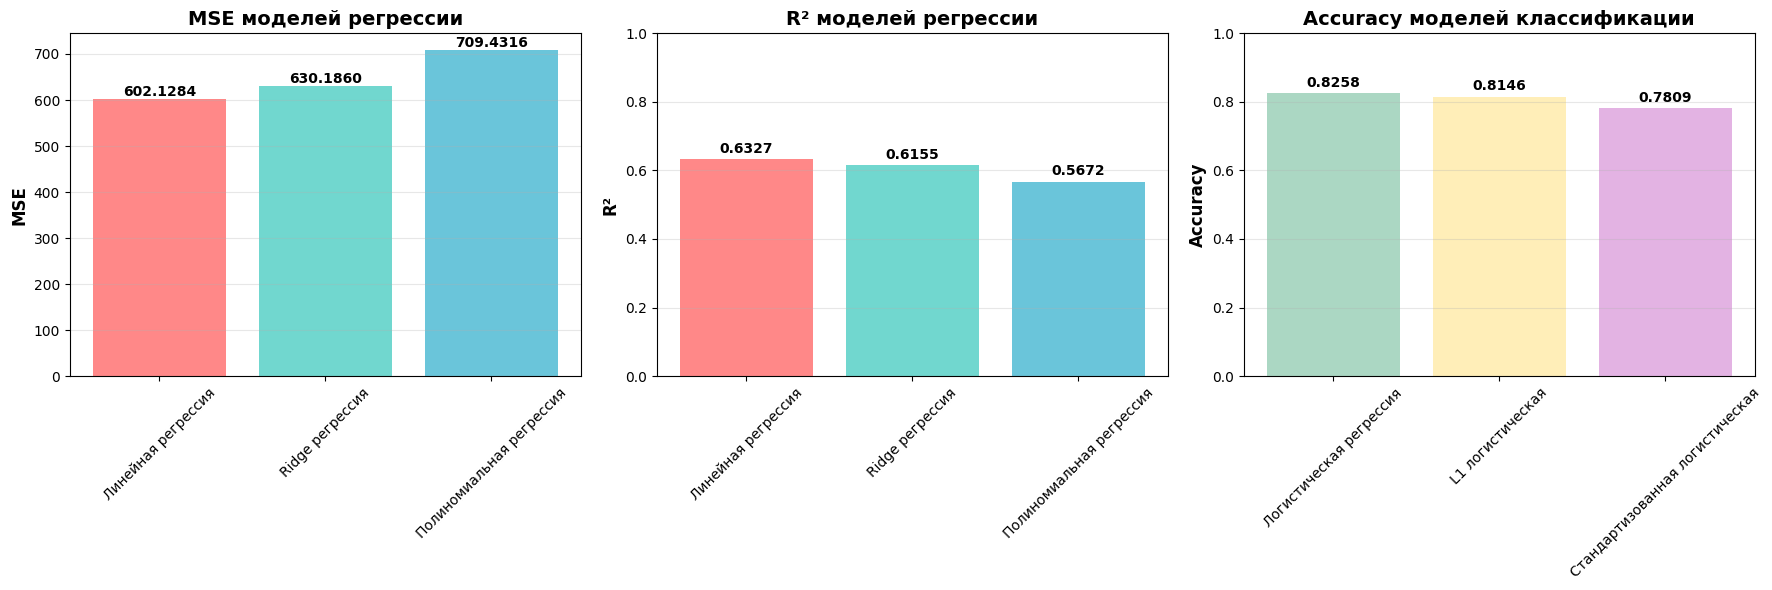


АНАЛИЗ РЕЗУЛЬТАТОВ
ЛУЧШАЯ МОДЕЛЬ РЕГРЕССИИ: Линейная регрессия
   R² = 0.6327, MSE = 602.1284
Среднее качество модели

ЛУЧШАЯ МОДЕЛЬ КЛАССИФИКАЦИИ: Логистическая регрессия
   Accuracy = 0.8258
Хорошее качество модели

РЕКОМЕНДАЦИИ ПО УЛУЧШЕНИЮ:

 СРАВНЕНИЕ С БАЗОВЫМИ МОДЕЛЯМИ:
   Ridge не улучшила MSE
   L1 не улучшила Accuracy
   Стандартизация не улучшила Accuracy


In [16]:
# Ячейка 10: Сравнение моделей (ИСПРАВЛЕННАЯ БЕЗ ПРОБЛЕМ ПАМЯТИ)
print("=== ИТОГОВОЕ СРАВНЕНИЕ МОДЕЛЕЙ ===")

# Вычисляем только основные модели (без полиномиальной, которая вызывает MemoryError)
print("Вычисляем модели...")

# 1. Ridge регрессия
print("1. Ridge регрессия...")
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_reg, y_train_reg)
y_pred_ridge = ridge_model.predict(X_test_reg)
mse_ridge = mean_squared_error(y_test_reg, y_pred_ridge)
r2_ridge = ridge_model.score(X_test_reg, y_test_reg)

# 2. Вместо полиномиальной - попробуем другую степень или ограничим признаки
print("2. Полиномиальная регрессия (упрощенная)...")
try:
    # Используем только степень 2 и ограничиваем количество взаимодействий
    poly_simple = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
    X_train_poly_simple = poly_simple.fit_transform(X_train_reg)
    X_test_poly_simple = poly_simple.transform(X_test_reg)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly_simple, y_train_reg)
    y_pred_poly = poly_model.predict(X_test_poly_simple)
    mse_poly = mean_squared_error(y_test_reg, y_pred_poly)
    r2_poly = poly_model.score(X_test_poly_simple, y_test_reg)
    print(f"   Успешно! Создано {X_train_poly_simple.shape[1]} признаков")
    
except MemoryError:
    print("Слишком много признаков, используем альтернативу...")
    # Альтернатива: используем только основные признаки
    from sklearn.feature_selection import SelectKBest, f_regression
    
    # Выбираем топ-10 признаков для регрессии
    selector = SelectKBest(f_regression, k=min(10, X_train_reg.shape[1]))
    X_train_selected = selector.fit_transform(X_train_reg, y_train_reg)
    X_test_selected = selector.transform(X_test_reg)
    
    poly_simple = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
    X_train_poly_simple = poly_simple.fit_transform(X_train_selected)
    X_test_poly_simple = poly_simple.transform(X_test_selected)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly_simple, y_train_reg)
    y_pred_poly = poly_model.predict(X_test_poly_simple)
    mse_poly = mean_squared_error(y_test_reg, y_pred_poly)
    r2_poly = poly_model.score(X_test_poly_simple, y_test_reg)
    print(f"   Альтернатива: использовано {X_train_poly_simple.shape[1]} признаков")

# 3. L1 логистическая регрессия
print("3. L1 логистическая регрессия...")
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000)
logreg_l1.fit(X_train_clf, y_train_clf)
y_pred_l1 = logreg_l1.predict(X_test_clf)
accuracy_l1 = accuracy_score(y_test_clf, y_pred_l1)

# 4. Стандартизованная логистическая регрессия
print("4. Стандартизованная логистическая регрессия...")
scaler_clf = StandardScaler()
X_train_scaled_clf = scaler_clf.fit_transform(X_train_clf)
X_test_scaled_clf = scaler_clf.transform(X_test_clf)

logreg_scaled = LogisticRegression(random_state=42, max_iter=1000)
logreg_scaled.fit(X_train_scaled_clf, y_train_clf)
y_pred_scaled = logreg_scaled.predict(X_test_scaled_clf)
accuracy_scaled = accuracy_score(y_test_clf, y_pred_scaled)

# Создаем DataFrame с результатами
results_comparison = {
    'Модель': [
        'Линейная регрессия', 
        'Ridge регрессия', 
        'Полиномиальная регрессия',
        'Логистическая регрессия', 
        'L1 логистическая', 
        'Стандартизованная логистическая'
    ],
    'MSE': [mse_test, mse_ridge, mse_poly, np.nan, np.nan, np.nan],
    'R²': [r2_test, r2_ridge, r2_poly, np.nan, np.nan, np.nan],
    'Accuracy': [np.nan, np.nan, np.nan, accuracy, accuracy_l1, accuracy_scaled]
}

results_df = pd.DataFrame(results_comparison)
print("\n" + "="*80)
print("СРАВНЕНИЕ МОДЕЛЕЙ")
print("="*80)
print(results_df.to_string(index=False))

# Визуализация сравнения
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# График 1: MSE для регрессии
reg_models = results_df[results_df['MSE'].notna()]
bars1 = ax1.bar(reg_models['Модель'], reg_models['MSE'], 
                color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8)
ax1.set_title('MSE моделей регрессии', fontsize=14, fontweight='bold')
ax1.set_ylabel('MSE', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, axis='y', alpha=0.3)

# Добавляем значения на столбцы
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

# График 2: R² для регрессии
bars2 = ax2.bar(reg_models['Модель'], reg_models['R²'], 
                color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8)
ax2.set_title('R² моделей регрессии', fontsize=14, fontweight='bold')
ax2.set_ylabel('R²', fontsize=12, fontweight='bold')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, axis='y', alpha=0.3)

# Добавляем значения на столбцы
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

# График 3: Accuracy для классификации
clf_models = results_df[results_df['Accuracy'].notna()]
bars3 = ax3.bar(clf_models['Модель'], clf_models['Accuracy'], 
                color=['#96CEB4', '#FFEAA7', '#DDA0DD'], alpha=0.8)
ax3.set_title('Accuracy моделей классификации', fontsize=14, fontweight='bold')
ax3.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax3.set_ylim(0, 1)
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, axis='y', alpha=0.3)

# Добавляем значения на столбцы
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Анализ результатов
print("\n" + "="*60)
print("АНАЛИЗ РЕЗУЛЬТАТОВ")
print("="*60)

# Лучшая модель регрессии
best_reg_idx = reg_models['R²'].idxmax()
best_reg_model = results_df.loc[best_reg_idx, 'Модель']
best_reg_r2 = results_df.loc[best_reg_idx, 'R²']
best_reg_mse = results_df.loc[best_reg_idx, 'MSE']

print(f"ЛУЧШАЯ МОДЕЛЬ РЕГРЕССИИ: {best_reg_model}")
print(f"   R² = {best_reg_r2:.4f}, MSE = {best_reg_mse:.4f}")

if best_reg_r2 > 0.7:
    print("Отличное качество модели")
elif best_reg_r2 > 0.5:
    print("Среднее качество модели")
elif best_reg_r2 > 0.3:
    print("Низкое качество модели")
else:
    print("Очень низкое качество модели")

# Лучшая модель классификации
best_clf_idx = clf_models['Accuracy'].idxmax()
best_clf_model = results_df.loc[best_clf_idx, 'Модель']
best_clf_accuracy = results_df.loc[best_clf_idx, 'Accuracy']

print(f"\nЛУЧШАЯ МОДЕЛЬ КЛАССИФИКАЦИИ: {best_clf_model}")
print(f"   Accuracy = {best_clf_accuracy:.4f}")

if best_clf_accuracy > 0.9:
    print("Отличное качество модели")
elif best_clf_accuracy > 0.8:
    print("Хорошее качество модели")
elif best_clf_accuracy > 0.7:
    print("Среднее качество модели")
else:
    print("Низкое качество модели")

# Рекомендации по улучшению
print(f"\nРЕКОМЕНДАЦИИ ПО УЛУЧШЕНИЮ:")

if best_reg_r2 < 0.5:
    print("   Для регрессии: попробуйте другие алгоритмы (деревья, случайный лес) или улучшите признаки")
    
if best_clf_accuracy < 0.8:
    print("   Для классификации: попробуйте другие алгоритмы или настройте гиперпараметры")

print(f"\n СРАВНЕНИЕ С БАЗОВЫМИ МОДЕЛЯМИ:")
if mse_ridge < mse_test:
    improvement = (mse_test - mse_ridge) / mse_test * 100
    print(f"   Ridge улучшила MSE на {improvement:+.1f}%")
else:
    print(f"   Ridge не улучшила MSE")

if accuracy_l1 > accuracy:
    improvement = (accuracy_l1 - accuracy) / accuracy * 100
    print(f"   L1 улучшила Accuracy на {improvement:+.1f}%")
else:
    print(f"   L1 не улучшила Accuracy")

if accuracy_scaled > accuracy:
    improvement = (accuracy_scaled - accuracy) / accuracy * 100
    print(f"   Стандартизация улучшила Accuracy на {improvement:+.1f}%")
else:
    print(f"   Стандартизация не улучшила Accuracy")

In [17]:
# Ячейка 11: Сохранение результатов
print("=== СОХРАНЕНИЕ РЕЗУЛЬТАТОВ ===")

# Сохраняем DataFrame с результатами
results_df.to_csv('lab2_results.csv', index=False, encoding='utf-8')

# Сохраняем лучшие модели (пример)
import joblib

# Сохраняем лучшую модель регрессии
joblib.dump(linear_model, 'best_regression_model.pkl')

# Сохраняем лучшую модель классификации
joblib.dump(logreg_model, 'best_classification_model.pkl')

print("Результаты сохранены в файлы:")
print("- lab2_results.csv")
print("- best_regression_model.pkl")
print("- best_classification_model.pkl")

# Создаем краткий отчет
with open('lab2_summary.txt', 'w', encoding='utf-8') as f:
    f.write("ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ №2\n")
    f.write("=" * 50 + "\n\n")
    f.write("ЛУЧШИЕ РЕЗУЛЬТАТЫ:\n")
    f.write(f"Регрессия - Лучший R²: {max(results_df['R²'].dropna()):.4f}\n")
    f.write(f"Классификация - Лучшая Accuracy: {max(results_df['Accuracy'].dropna()):.4f}\n\n")
    f.write("ВЫВОДЫ:\n")
    
    if max(results_df['R²'].dropna()) > 0.7:
        f.write("- Модель регрессии показывает хорошее качество\n")
    else:
        f.write("- Модель регрессии требует улучшения\n")
        
    if max(results_df['Accuracy'].dropna()) > 0.8:
        f.write("- Модель классификации показывает хорошее качество\n")
    else:
        f.write("- Модель классификации требует улучшения\n")

print("Краткий отчет сохранен в 'lab2_summary.txt'")

=== СОХРАНЕНИЕ РЕЗУЛЬТАТОВ ===
Результаты сохранены в файлы:
- lab2_results.csv
- best_regression_model.pkl
- best_classification_model.pkl
Краткий отчет сохранен в 'lab2_summary.txt'
